# Lesson17 Transfer Learning

## Transfer Learning

### 1. The Four Main Cases When Using Transfer Learning
Transfer learning involves taking a pre-trained neural network and adapting the neural network to a new, different data set.

Depending on both:
- the size of the new data set, and
- the similarity of the new data set to the original data set

the approach for using transfer learning will be different. There are four main cases:
1. new data set is small, new data is similar to original training data
2. new data set is small, new data is different from original training data
3. new data set is large, new data is similar to original training data
4. new data set is large, new data is different from original training data

|<img src = https://video.udacity-data.com/topher/2017/February/58a608ea_02-guide-how-transfer-learning-v3-01/02-guide-how-transfer-learning-v3-01.png width = 700>|
|:---:|
|Four Cases When Using Transfer Learning|

A large data set might have one million images. A small data could have two-thousand images. The dividing line between a large data set and small data set is somewhat subjective. Overfitting is a concern when using transfer learning with a small data set.

Images of dogs and images of wolves would be considered similar; the images would share common characteristics. A data set of flower images would be different from a data set of dog images.

Each of the four transfer learning cases has its own approach. In the following sections, we will look at each case one by one.

### 2. Demonstration Network
To explain how each situation works, we will start with a generic pre-trained convolutional neural network and explain how to adjust the network for each case. Our example network contains three convolutional layers and three fully connected layers:

|<img src = https://video.udacity-data.com/topher/2017/February/58a73a2e_02-guide-how-transfer-learning-v3-02/02-guide-how-transfer-learning-v3-02.png width = 700>|
|:---:|
|General Overview of a Neural Network|

Here is an generalized overview of what the convolutional neural network does:

- the first layer will detect edges in the image
- the second layer will detect shapes
- the third convolutional layer detects higher level features

Each transfer learning case will use the pre-trained convolutional neural network in a different way.

#### Case 1: Samll Data Set, Similiar Data

|<img src = https://video.udacity-data.com/topher/2017/February/58a60b70_02-guide-how-transfer-learning-v3-03/02-guide-how-transfer-learning-v3-03.png width = 700>|
|:---:|
|Case 1: Small Data Set with Similar Data|

If the new data set is small and similar to the original training data:

- slice off the end of the neural network
- add a new fully connected layer that matches the number of classes in the new data set
- randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
- train the network to update the weights of the new fully connected layer

To avoid overfitting on the small data set, the weights of the original network will be held constant rather than re-training the weights.

Since the data sets are similar, images from each data set will have similar higher level features. Therefore most or all of the pre-trained neural network layers already contain relevant information about the new data set and should be kept.

Here's how to visualize this approach:

|<img src = https://video.udacity-data.com/topher/2017/February/58a73c8d_02-guide-how-transfer-learning-v3-04/02-guide-how-transfer-learning-v3-04.png width = 700>|
|:---:|
|Neural Network with Small Data Set, Similar Data|

#### Case 2: Small Data Set, Different Data
|<img src = https://video.udacity-data.com/topher/2017/February/58a60eaf_02-guide-how-transfer-learning-v3-05/02-guide-how-transfer-learning-v3-05.png width = 700>|
|:---:|
|Case 2: Small Data Set, Different Data|

If the new data set is small and different from the original training data:

- slice off most of the pre-trained layers near the beginning of the network
- add to the remaining pre-trained layers a new fully connected layer that matches the number of classes in the new data set
- randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
- train the network to update the weights of the new fully connected layer

Because the data set is small, overfitting is still a concern. To combat overfitting, the weights of the original neural network will be held constant, like in the first case.

But the original training set and the new data set do not share higher level features. In this case, the new network will only use the layers containing lower level features.

Here is how to visualize this approach:

|<img src = https://video.udacity-data.com/topher/2017/February/58a73bd8_02-guide-how-transfer-learning-v3-06/02-guide-how-transfer-learning-v3-06.png width = 700>|
|:---:|
|Neural Network with Small Data Set, Different Data|


#### Case 3: Large Data Set, Similar Data
|<img src = https://video.udacity-data.com/topher/2017/February/58a6176d_02-guide-how-transfer-learning-v3-07/02-guide-how-transfer-learning-v3-07.png width = 700>|
|:---:|
|Case 3: Large Data Set, Similar Data|

If the new data set is large and similar to the original training data:

- remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
- randomly initialize the weights in the new fully connected layer
- initialize the rest of the weights using the pre-trained weights
- re-train the entire neural network

Overfitting is not as much of a concern when training on a large data set; therefore, you can re-train all of the weights.

Because the original training set and the new data set share higher level features, the entire neural network is used as well.

Here is how to visualize this approach:

|<img src = https://video.udacity-data.com/topher/2017/February/58a73ccd_02-guide-how-transfer-learning-v3-08/02-guide-how-transfer-learning-v3-08.png width = 700>|
|:---:|
|Neural Network with Large Data Set, Similar Data|

#### Case 4: Large Data Set, Different Data

|<img src = https://video.udacity-data.com/topher/2017/February/58a61e66_02-guide-how-transfer-learning-v3-09/02-guide-how-transfer-learning-v3-09.png width = 700>|
|:---:|
|Case 4: Large Data Set, Different Data|

If the new data set is large and different from the original training data:

- remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
- retrain the network from scratch with randomly initialized weights
- alternatively, you could just use the same strategy as the "large and similar" data case

Even though the data set is different from the training data, initializing the weights from the pre-trained network might make training faster. So this case is exactly the same as the case with a large, similar data set.

If using the pre-trained network as a starting point does not produce a successful model, another option is to randomly initialize the convolutional neural network weights and train the network from scratch.

Here is how to visualize this approach:

|<img src = https://video.udacity-data.com/topher/2017/February/58a73d0d_02-guide-how-transfer-learning-v3-10/02-guide-how-transfer-learning-v3-10.png width = 700>|
|:---:|
|Neural Network with Large Data Set, Different Data|

### 3. ImageNet
ImageNet was its own competition from 2012-2017, but now it's hosted on [Kaggle](https://www.kaggle.com/c/imagenet-object-localization-challenge)! There are 1,000 different image categories between over 14 million images, so it's a great way to get involved with large datasets.

Pre-training a network with the ImageNet dataset is a very common way to get a strong neural network that can be used for transfer learning. With recent versions of Keras, you can easily import a pre-trained network by using the [Keras Applications](https://keras.io/applications/) models. We'll come back to this soon.

### 4. AlexNet Architecture
AlexNet puts the network on two GPUs, which allows for building a larger network. Although most of the calculations are done in parallel, the GPUs communicate with each other in certain layers. The [original research paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) on AlexNet said that parallelizing the network decreased the classification error rate by 1.7% when compared to a neural network that used half as many neurons on one GPU.

|<img src = https://video.udacity-data.com/topher/2017/February/58a63da6_08-alexnet-1/08-alexnet-1.png width = 700>|
|:---:|
|AlexNet Architecture|

### 5. VGG(Visual Geometry Group at Oxford University)
You can find the original VGG paper [here](https://arxiv.org/pdf/1409.1556.pdf).

#### VGG in Keras
As we mentioned earlier, you can fairly quickly utilize a pre-trained model with [Keras Applications](https://keras.io/applications/). VGG16 is one of the built-in models supported. There are actually two versions of VGG, VGG16 and VGG19 (where the numbers denote the number of layers included in each respective model), and you can utilize either with Keras, but we'll work with VGG16 here.

```python
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=False)
```

There are two arguments to `VGG16` in this example, although there could be more or less (check out the linked documentation to see other possible arguments). The first, `weights='imagenet'`, loads the pre-trained ImageNet weights. This is actually the default argument per the documentation, so if you don't include it, you should still be loading the ImageNet weights. However, you can also specify `None` here to get random weights if you just want the architecture of VGG16; this is not suggested here since you won't get the benefit of transfer learning.

The argument `include_top` is for whether you want to include the fully-connected layer at the top of the network; unless you are actually trying to classify ImageNet's 1,000 classes, you likely want to set this to `False` and add your own additional layer for the output you desire.

#### Pre-processing for ImageNet weights
There is another item to consider before jumping into using an ImageNet pre-trained model. These networks are typically pre-trained with a specific type of pre-processing, so you need to make sure to use the same pre-processing steps, or your network's outputs will likely be erratic.

VGG uses 224x224 images as input, so that's another thing to consider.
```
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

img_path = 'your_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
```

#### Demo 1: Using VGG with Keras

Below, you'll be able to check out the predictions from an ImageNet pre-trained VGG network with Keras.

**1. Load some example images**

['images\\dog_labrador.jpg', 'images\\elephant.jpg', 'images\\zebra.jpg']


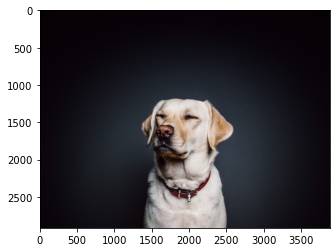

In [ ]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image_paths = glob('images/*.jpg')

# Print out the image paths
print(image_paths)

# View an example of an image
example = mpimg.imread(image_paths[0])
plt.imshow(example)
plt.show()

**2. Pre-process an image**   

Note that the `image.load_img()` function will re-size our image to 224x224 as desired for input into this VGG16 model, so the images themselves don't have to be 224x224 to start.

In [ ]:
# Here, we'll load an image and pre-process it
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

i = 2 # Can change this to your desired image to test
img_path = image_paths[i]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Using TensorFlow backend.


**3. Load VGG16 pre-trained model**   

We won't throw out the top fully-connected layer this time when we load the model, as we actually want the true ImageNet-related output. However, you'll learn how to do this in a later lab. The inference will be a little slower than you might expect here as we are not using GPU just yet.

Note also the use of `decode_predictions` which will map the prediction to the class name.

In [ ]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load the pre-trained model
model = VGG16(weights='imagenet')

# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print('Predicted:', decode_predictions(predictions, top=3)[0])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Predicted: [('n02391049', 'zebra', 0.9999578), ('n01798484', 'prairie_chicken', 2.7822321e-05), ('n02128925', 'jaguar', 4.685409e-06)]


You should mostly get the correct answers here. In our own run, it predicted a Tusker elephant with an African elephant in second place (the image is of an African elephant), correctly selected a labrador, and very confidently predicted a zebra. You can add some of your own images into the `images/` folder by clicking on the jupyter logo in the top left and see how it performs on your own examples!

### 5. GoogLeNet
You can find the original GoogLeNet/Inception paper [here](https://arxiv.org/pdf/1409.4842.pdf).

#### GoogLeNet/Inception in Keras
Inception is also one of the models included in [Keras Applications](https://keras.io/applications/). Utilizing this model follows pretty much the same steps as using VGG, although this time you'll use the `InceptionV3` architecture.

```python
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(weights='imagenet', include_top=False)
```

Don't forget to perform the necessary pre-processing steps to any inputs you include! While the original Inception model used a 224x224 input like VGG, InceptionV3 actually uses a 299x299 input.

### 6. ResNet
[Here](https://arxiv.org/pdf/1512.03385.pdf) is the original ResNet paper, for those interested.

#### ResNet in Keras
As you may have guessed, ResNet is also a model included in Keras Applications, under `ResNet50`.

```python
from keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
```

Again, you'll need to do ImageNet-related pre-processing if you want to use the pre-trained weights for it. ResNet50 has a 224x224 input size.

### 7. Without Pre-trained Weights

#### Using Keras Applications models without pre-trained weights
So far, you've seen the effectiveness of models pre-trained on ImageNet weights, but what if we specify `weights=None` when we load a model? Well, you'll instead be randomly initializing the weights, as if you had built a model on your own and were starting from scratch.

From our chart before, there are few situations where this might even be a potential use case - basically, when you have data that is very different from the original data. However, given the large size of the ImageNet dataset (remember, it's over 14 million images from 1,000 classes!), it's highly unlikely this is really the case - it will almost always make the most sense to start with ImageNet pre-trained weights, and only fine-tune from there

|<img src = 'https://video.udacity-data.com/topher/2017/April/58e80aac_02-guide-how-transfer-learning-v3-01/02-guide-how-transfer-learning-v3-01.png' width = 700>|
|:---:|
|Four Use Cases of Transfer Learning|

Below, let's check out what happens when we try to use a pre-made model but set the weights to `None` - this means no training has occurred yet!

#### Demo: VGG without Pre-trained Weights

Below, you'll see how setting `weights=None` is equivalent to an un-trained network.

**1. Load example images and pre-process them**

In [ ]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

image_paths = glob('images/*.jpg')

i = 2 # Can change this to your desired image to test
img_path = image_paths[i]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

** 2.Load VGG16 model, but without pre-trained weights**
This time, we won't use the pre-trained weights, so we'll likely get so wacky predictions.

In [ ]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load VGG16 without pre-trained weights
model = VGG16(weights=None)

# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n03763968', 'military_uniform', 0.0024267747), ('n02102177', 'Welsh_springer_spaniel', 0.0023948336), ('n03146219', 'cuirass', 0.002335257)]


When we ran each image, we got a hand-blower, a guenon (a type of African monkey) and a mink. A little bit different than the elephant, labrador and zebra they are supposed to be!

In the following lab, you'll get a chance to actually add layers to the end of a pre-trained model, so that you can actually use the full power of transfer learning, instead of just using it toward the 1,000 ImageNet classes as a whole.

## Lab: Transfer Learning
In the below lab, you'll get a chance to try out a few instances of transfer learning, including both frozen and non-frozen pre-trained weights.

### Frozen Weights
Frozen weights are often used when only fine-tuning the model, as backpropagation and weight updates will not be applied to any frozen layers during training. If you have an ImageNet pre-trained model, most of the network is likely applicable to your situation, so you may only need to cut off the top fully-connected layer, freeze all other layers, and just add one or more layers at the end that are not frozen to perform some fine-tuning.

There is also the option of not freezing the weights, which will start your model on the ImageNet pre-trained weights (if applicable) and then perform further training from there.

An additional benefit of freezing the weights also comes in the form of memory usage and training speed - for the larger networks such as VGG, there is a substantially larger memory usage and slower speed when it needs to perform backpropagation and weight updates across all layers instead of just on a small portion of (likely smaller) layers.

Note: There is a solution notebook that can be found by clicking on the Jupyter logo in the upper left of the workspace if you get stuck.

Lab: Transfer Learning
In the below lab, you'll get a chance to try out a few instances of transfer learning, including both frozen and non-frozen pre-trained weights.

Frozen Weights
Frozen weights are often used when only fine-tuning the model, as backpropagation and weight updates will not be applied to any frozen layers during training. If you have an ImageNet pre-trained model, most of the network is likely applicable to your situation, so you may only need to cut off the top fully-connected layer, freeze all other layers, and just add one or more layers at the end that are not frozen to perform some fine-tuning.

There is also the option of not freezing the weights, which will start your model on the ImageNet pre-trained weights (if applicable) and then perform further training from there.

An additional benefit of freezing the weights also comes in the form of memory usage and training speed - for the larger networks such as VGG, there is a substantially larger memory usage and slower speed when it needs to perform backpropagation and weight updates across all layers instead of just on a small portion of (likely smaller) layers.

Note: There is a solution notebook that can be found by clicking on the Jupyter logo in the upper left of the workspace if you get stuck.

### Lab: Transfer Learning

Welcome to the lab on Transfer Learning! Here, you'll get a chance to try out training a network with ImageNet pre-trained weights as a base, but with additional network layers of your own added on. You'll also get to see the difference between using frozen weights and training on all layers.

#### GPU usage
In our previous examples in this lesson, we've avoided using GPU, but this time around you'll have the option to enable it. You do not need it on to begin with, but make sure anytime you switch from non-GPU to GPU, or vice versa, that you save your notebook! If not, you'll likely be reverted to the previous checkpoint. 

We also suggest only using the GPU when performing the (mostly minor) training below - you'll want to conserve GPU hours for your Behavioral Cloning project coming up next!

In [32]:
## For COLAB

# %tensorflow_version 1.x
# import tensorflow as tf
# print("Tensorflow version   : {}".format(tf.__version__))

# import keras
# print("Keras version        : {}".format(keras.__version__))

In [2]:
# Set a couple flags for training - you can ignore these for now
freeze_flag = True  # `True` to freeze layers, `False` for full training
weights_flag = 'imagenet' # 'imagenet' or None
preprocess_flag = True # Should be true for ImageNet pre-trained typically

# Loads in InceptionV3
from keras.applications.inception_v3 import InceptionV3

# We can use smaller than the default 299x299x3 input for InceptionV3
# which will speed up training. Keras v2.0.9 supports down to 139x139x3
input_size = 139

# Using Inception with ImageNet pre-trained weights
inception = InceptionV3(weights=weights_flag, include_top=False,
                        input_shape=(input_size,input_size,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




We'll use Inception V3 for this lab, although you can use the same techniques with any of the models in [Keras Applications](https://keras.io/applications/). Do note that certain models are only available in certain versions of Keras; this workspace uses Keras v2.0.9, for which you can see the available models [here](https://faroit.github.io/keras-docs/2.0.9/applications/).

In the above, we've set Inception to use an `input_shape` of 139x139x3 instead of the default 299x299x3. This will help us to speed up our training a bit later (and we'll actually be upsampling from smaller images, so we aren't losing data here). In order to do so, we also must set `include_top` to `False`, which means the final fully-connected layer with 1,000 nodes for each ImageNet class is dropped, as well as a Global Average Pooling layer.

### Pre-trained with frozen weights
To start, we'll see how an ImageNet pre-trained model with all weights frozen in the InceptionV3 model performs. We will also drop the end layer and append new layers onto it, although you could do this in different ways (not drop the end and add new layers, drop more layers than we will here, etc.).

You can freeze layers by setting `layer.trainable` to False for a given `layer`. Within a `model`, you can get the list of layers with `model.layers`.

In [3]:
if freeze_flag == True:
    ## TODO: Iterate through the layers of the Inception model
    ##       loaded above and set all of them to have trainable = False
    for layer in inception.layers:
        layer.trainable = False

### Dropping layers
You can drop layers from a model with `model.layers.pop()`. Before you do this, you should check out what the actual layers of the model are with Keras's `.summary()` function.

In [4]:
## TODO: Use the model summary function to see all layers in the
##       loaded Inception model
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 139, 139, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 69, 69, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 69, 69, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 69, 69, 32)   0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In a normal Inception network, you would see from the model summary that the last two layers were a global average pooling layer, and a fully-connected "Dense" layer. However, since we set `include_top` to `False`, both of these get dropped. If you otherwise wanted to drop additional layers, you would use:

```
inception.layers.pop()
```

Note that `pop()` works from the end of the model backwards.

It's important to note two things here:
1. How many layers you drop is up to you, typically. We dropped the final two already by setting `include_top` to False in the original loading of the model, but you could instead just run `pop()` twice to achieve similar results. (*Note:* Keras requires us to set `include_top` to False in order to change the `input_shape`.) Additional layers could be dropped by additional calls to `pop()`.
2. If you make a mistake with `pop()`, you'll want to reload the model. If you use it multiple times, the model will continue to drop more and more layers, so you may need to check `model.summary()` again to check your work.

### Adding new layers

Now, you can start to add your own layers. While we've used Keras's `Sequential` model before for simplicity, we'll actually use the [Model API](https://keras.io/models/model/) this time. This functions a little differently, in that instead of using `model.add()`, you explicitly tell the model which previous layer to attach to the current layer. This is useful if you want to use more advanced concepts like [skip layers](https://en.wikipedia.org/wiki/Residual_neural_network), for instance (which were used heavily in ResNet).

For example, if you had a previous layer named `inp`:
```
x = Dropout(0.2)(inp)
```
is how you would attach a new dropout layer `x`, with it's input coming from a layer with the variable name `inp`.

We are going to use the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which consists of 60,000 32x32 images of 10 classes. We need to use Keras's `Input` function to do so, and then we want to re-size the images up to the `input_size` we specified earlier (139x139).

In [5]:
from keras.layers import Input, Lambda
%tensorflow_version 1.x
import tensorflow as tf

# Makes the input placeholder layer 32x32x3 for CIFAR-10
cifar_input = Input(shape=(32,32,3))

# Re-sizes the input with Kera's Lambda layer & attach to cifar_input
resized_input = Lambda(lambda image: tf.image.resize_images( 
    image, (input_size, input_size)))(cifar_input)

# Feeds the re-sized input into Inception model
# You will need to update the model name if you changed it earlier!
inp = inception(resized_input)

In [6]:
# Imports fully-connected "Dense" layers & Global Average Pooling
from keras.layers import Dense, GlobalAveragePooling2D

## TODO: Setting `include_top` to False earlier also removed the
##       GlobalAveragePooling2D layer, but we still want it.
##       Add it here, and make sure to connect it to the end of Inception
x = GlobalAveragePooling2D()(inp)

## TODO: Create two new fully-connected layers using the Model API
##       format discussed above. The first layer should use `out`
##       as its input, along with ReLU activation. You can choose
##       how many nodes it has, although 512 or less is a good idea.
##       The second layer should take this first layer as input, and
##       be named "predictions", with Softmax activation and 
##       10 nodes, as we'll be using the CIFAR10 dataset.
x = Dense(512, activation = 'relu')(x)
predictions = Dense(10, activation = 'softmax')(x)

We're almost done with our new model! Now we just need to use the actual Model API to create the full model.

In [8]:
# Imports the Model API
from keras.models import Model

# Creates the model, assuming your final layer is named "predictions"
model = Model(inputs=cifar_input, outputs=predictions)

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the summary of this new model to confirm the architecture
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 139, 139, 3)       0         
_________________________________________________________________
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 22,857,002
Trainable params: 1,054,218
Non-trainable params: 21,802,784
_______________________________________

Great job creating a new model architecture from Inception! Notice how this method of adding layers before InceptionV3 and appending to the end of it made InceptionV3 condense down into one line in the summary; if you use the Inception model's normal input (which you could gather from `inception.layers.input`), it would instead show all the layers like before.

Most of the rest of the code in the notebook just goes toward loading our data, pre-processing it, and starting our training in Keras, although there's one other good point to make here - Keras callbacks.

### Keras Callbacks
Keras [callbacks](https://keras.io/callbacks/) allow you to gather and store additional information during training, such as the best model, or even stop training early if the validation accuracy has stopped improving. These methods can help to avoid overfitting, or avoid other issues.

There's two key callbacks to mention here, `ModelCheckpoint` and `EarlyStopping`. As the names may suggest, model checkpoint saves down the best model so far based on a given metric, while early stopping will end training before the specified number of epochs if the chosen metric no longer improves after a given amount of time.

To set these callbacks, you could do the following:
```
checkpoint = ModelCheckpoint(filepath=save_path, monitor='val_loss', save_best_only=True)
```
This would save a model to a specified `save_path`, based on validation loss, and only save down the best models. If you set `save_best_only` to `False`, every single epoch will save down another version of the model.
```
stopper = EarlyStopping(monitor='val_acc', min_delta=0.0003, patience=5)
```
This will monitor validation accuracy, and if it has not decreased by more than 0.0003 from the previous best validation accuracy for 5 epochs, training will end early.


You still need to actually feed these callbacks into `fit()` when you train the model (along with all other relevant data to feed into `fit`):
```
model.fit(callbacks=[checkpoint, stopper])
```

## GPU time

The rest of the notebook will give you the code for training, so you can turn on the GPU at this point - but first, **make sure to save your jupyter notebook**. Once the GPU is turned on, it will load whatever your last notebook checkpoint is. 

While we suggest reading through the code below to make sure you understand it, you can otherwise go ahead and select *Cell > Run All* (or *Kernel > Restart & Run All* if already using GPU) to run through all cells in the notebook.

In [9]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y_one_hot_train = label_binarizer.fit_transform(y_train)
y_one_hot_val = label_binarizer.fit_transform(y_val)

# Shuffle the training & test data
X_train, y_one_hot_train = shuffle(X_train, y_one_hot_train)
X_val, y_one_hot_val = shuffle(X_val, y_one_hot_val)

# We are only going to use the first 10,000 images for speed reasons
# And only the first 2,000 images from the test set
X_train = X_train[:10000]
y_one_hot_train = y_one_hot_train[:10000]
X_val = X_val[:2000]
y_one_hot_val = y_one_hot_val[:2000]

170500096/170498071 [==============================] - 2s 0us/step


You can check out Keras's [ImageDataGenerator documentation](https://faroit.github.io/keras-docs/2.0.9/preprocessing/image/) for more information on the below - you can also add additional image augmentation through this function, although we are skipping that step here so you can potentially explore it in the upcoming project.

In [10]:
# Use a generator to pre-process our images for ImageNet
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

if preprocess_flag == True:
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
else:
    datagen = ImageDataGenerator()
    val_datagen = ImageDataGenerator()

In [11]:
# Train the model
batch_size = 32
epochs = 5
# Note: we aren't using callbacks here since we only are using 5 epochs to conserve GPU time
model.fit_generator(datagen.flow(X_train, y_one_hot_train, batch_size=batch_size), 
                    steps_per_epoch=len(X_train)/batch_size, epochs=epochs, verbose=1, 
                    validation_data=val_datagen.flow(X_val, y_one_hot_val, batch_size=batch_size),
                    validation_steps=len(X_val)/batch_size)


Epoch 1/5
313/312 [==============================] - 28s 90ms/step - loss: 1.2806 - accuracy: 0.5681 - val_loss: 0.4499 - val_accuracy: 0.6570
Epoch 2/5
313/312 [==============================] - 18s 59ms/step - loss: 0.9635 - accuracy: 0.6686 - val_loss: 1.3283 - val_accuracy: 0.7000
Epoch 3/5
313/312 [==============================] - 18s 59ms/step - loss: 0.8818 - accuracy: 0.6956 - val_loss: 1.3337 - val_accuracy: 0.6940
Epoch 4/5
313/312 [==============================] - 19s 59ms/step - loss: 0.8303 - accuracy: 0.7090 - val_loss: 1.7292 - val_accuracy: 0.7285
Epoch 5/5
313/312 [==============================] - 19s 59ms/step - loss: 0.7738 - accuracy: 0.7330 - val_loss: 0.5852 - val_accuracy: 0.7210


As you may have noticed, CIFAR-10 is a fairly tough dataset. However, given that we are only training on a small subset of the data, only training for five epochs, and not using any image augmentation, the results are still fairly impressive!

We achieved ~70% validation accuracy here, although your results may vary.

## [Optional] Test without frozen weights, or by training from scratch.

Since the majority of the model was frozen above, training speed is pretty quick. You may also want to check out the training speed, as well as final accuracy, if you don't freeze the weights. Note that this can be fairly slow, so we're marking this as optional in order to conserve GPU time. 

If you do want to see the results from doing so, go back to the first code cell and set `freeze_flag` to `False`. If you want to completely train from scratch without ImageNet pre-trained weights, follow the previous step as well as setting `weights_flag` to `None`. Then, go to *Kernel > Restart & Run All*.

## Comparison

So that you don't use up your GPU time, we've tried out these results ourselves as well.

Training Mode | Val Acc @ 1 epoch | Val Acc @ 5 epoch | Time per epoch
---- | :----: | :----: | ----:
Frozen weights | 65.5% | 70.3% | 50 seconds
Unfrozen weights | 50.6% | 71.6% | 142 seconds
No pre-trained weights | 19.2% | 39.2% | 142 seconds

From the above, we can see that the pre-trained model with frozen weights actually began converging the fastest (already at 65.5% after 1 epoch), while the model re-training from the pre-trained weights slightly edged it out after 5 epochs.

However, this does not tell the whole story - the training accuracy was substantially higher, nearing 87% for the unfrozen weights model. It actually began overfit the data much more under this method. We would likely be able to counteract some of this issue by using data augmentation. On the flip side, the model using frozen weights could also have been improved by actually only freezing a portion of the weights; some of these are likely more specific to ImageNet classes as it gets later in the network, as opposed to the simpler features extracted early in the network.

### The Power of Transfer Learning
Comparing the last line to the other two really shows the power of transfer learning. After five epochs, a model without ImageNet pre-training had only achieved 39.2% accuracy, compared to over 70% for the other two. As such, pre-training the network has saved substantial time, especially given the additional training time needed when the weights are not frozen.

There is also evidence found in various research that pre-training on ImageNet weights will result in a higher overall accuracy than completely training from scratch, even when using a substantially different dataset.

## Additional Resources on Deep Learning
Nice work reaching the end of the deep learning content! While you still have the project left to do here, we're also providing some additional resources and recent research on the topic that you can come back to if you have time later on.

Reading research papers is a great way to get exposure to the latest and greatest in the field, as well as expand your learning. However, just like the project ahead, it's often best to learn by doing - if you find a paper that really excites you, try to implement it (or even something better) yourself!

### Optional Reading
All of these are completely optional reading - you could spend hours reading through the entirety of these! We suggest moving onto the project first so you have what you’ve learned fresh on your mind, before coming back to check these out.

We've categorized these papers to hopefully help you narrow down which ones might be of interest, as well as highlighted a couple key reads by category by including their Abstract section, which summarizes the paper.

---

### Behavioral Cloning
The below paper shows one of the techniques Waymo has researched using imitation learning (aka behavioral cloning) to drive a car.

[ChauffeurNet: Learning to Drive by Imitating the Best and Synthesizing the Worst](https://arxiv.org/abs/1812.03079) by M. Bansal, A. Krizhevsky and A. Ogale

 - **Abstract**: Our goal is to train a policy for autonomous driving via imitation learning that is robust enough to drive a real vehicle. We find that standard behavior cloning is insufficient for handling complex driving scenarios, even when we leverage a perception system for preprocessing the input and a controller for executing the output on the car: 30 million examples are still not enough. We propose exposing the learner to synthesized data in the form of perturbations to the expert's driving, which creates interesting situations such as collisions and/or going off the road. Rather than purely imitating all data, we augment the imitation loss with additional losses that penalize undesirable events and encourage progress -- the perturbations then provide an important signal for these losses and lead to robustness of the learned model. We show that the ChauffeurNet model can handle complex situations in simulation, and present ablation experiments that emphasize the importance of each of our proposed changes and show that the model is responding to the appropriate causal factors. Finally, we demonstrate the model driving a car in the real world.

---

### Object Detection and Tracking
The below papers include various deep learning-based approaches to 2D and 3D object detection and tracking.

[SSD: Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325) by W. Liu, et. al.

- **Abstract**: We present a method for detecting objects in images using a single deep neural network. Our approach, named SSD, discretizes the output space of bounding boxes into a set of default boxes over different aspect ratios and scales per feature map location. At prediction time, the network generates scores for the presence of each object category in each default box and produces adjustments to the box to better match the object shape. Additionally, the network combines predictions from multiple feature maps with different resolutions to naturally handle objects of various sizes. Our SSD model is simple relative to methods that require object proposals because it completely eliminates proposal generation and subsequent pixel or feature resampling stage and encapsulates all computation in a single network. [...] Experimental results [...] confirm that SSD has comparable accuracy to methods that utilize an additional object proposal step and is much faster, while providing a unified framework for both training and inference. Compared to other single stage methods, SSD has much better accuracy, even with a smaller input image size. [...]

[VoxelNet: End-to-End Learning for Point Cloud Based 3D Object Detection](https://arxiv.org/abs/1711.06396) by Y. Zhou and O. Tuzel

- **Abstract**: Accurate detection of objects in 3D point clouds is a central problem in many applications, such as autonomous navigation, housekeeping robots, and augmented/virtual reality. To interface a highly sparse LiDAR point cloud with a region proposal network (RPN), most existing efforts have focused on hand-crafted feature representations, for example, a bird's eye view projection. In this work, we remove the need of manual feature engineering for 3D point clouds and propose VoxelNet, a generic 3D detection network that unifies feature extraction and bounding box prediction into a single stage, end-to-end trainable deep network. [...] Experiments on the KITTI car detection benchmark show that VoxelNet outperforms the state-of-the-art LiDAR based 3D detection methods by a large margin. Furthermore, our network learns an effective discriminative representation of objects with various geometries, leading to encouraging results in 3D detection of pedestrians and cyclists, based on only LiDAR.

[Fast and Furious: Real Time End-to-End 3D Detection, Tracking and Motion Forecasting with a Single Convolutional Net](http://openaccess.thecvf.com/content_cvpr_2018/papers/Luo_Fast_and_Furious_CVPR_2018_paper.pdf) by W. Luo, et. al.

- **Abstract**: In this paper we propose a novel deep neural network that is able to jointly reason about 3D detection, tracking and motion forecasting given data captured by a 3D sensor. By jointly reasoning about these tasks, our holistic approach is more robust to occlusion as well as sparse data at range. Our approach performs 3D convolutions across space and time over a bird’s eye view representation of the 3D world, which is very efficient in terms of both memory and computation. Our experiments on a new very large scale dataset captured in several north american cities, show that we can outperform the state-of-the-art by a large margin. Importantly, by sharing computation we can perform all tasks in as little as 30 ms.

---

### Semantic Segmentation
The below paper concerns a technique called semantic segmentation, where each pixel of an image gets classified individually!

[SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation](https://arxiv.org/abs/1511.00561) by V. Badrinarayanan, A. Kendall and R. Cipolla

- **Abstract**: We present a novel and practical deep fully convolutional neural network architecture for semantic pixel-wise segmentation termed SegNet. [...] The novelty of SegNet lies in the manner in which the decoder upsamples its lower resolution input feature map(s). Specifically, the decoder uses pooling indices computed in the max-pooling step of the corresponding encoder to perform non-linear upsampling. This eliminates the need for learning to upsample. The upsampled maps are sparse and are then convolved with trainable filters to produce dense feature maps. We compare our proposed architecture with the widely adopted FCN and also with the well known DeepLab-LargeFOV, DeconvNet architectures. This comparison reveals the memory versus accuracy trade-off involved in achieving good segmentation performance. [...] We show that SegNet provides good performance with competitive inference time and more efficient inference memory-wise as compared to other architectures. [...]
